# In-class Homework for 5-state SA

In [1]:
%display typeset

In [2]:
P = Matrix([
    [1/3, 0, 1/3, 1/3, 0],
    [0, 1/4, 1/4, 1/4, 1/4],
    [1/3, 1/3, 1/3, 0, 0],
    [1/4, 1/4, 0, 1/4, 1/4],
    [0, 1/3, 0, 1/3, 1/3],
])

T = var("T")

A = Matrix([
    [1, exp(-1/T), exp(-2/T), exp(-3/T), 1],
    [1, 1, exp(-1/T), exp(-2/T), 1],
    [1, 1, 1, exp(-1/T), 1],
    [1, 1, 1, 1, 1],
    [1, exp(-1/T), exp(-2/T), exp(-3/T), 1],
])

P, A

(
[1/3   0 1/3 1/3   0]  [       1 e^(-1/T) e^(-2/T) e^(-3/T)        1]
[  0 1/4 1/4 1/4 1/4]  [       1        1 e^(-1/T) e^(-2/T)        1]
[1/3 1/3 1/3   0   0]  [       1        1        1 e^(-1/T)        1]
[1/4 1/4   0 1/4 1/4]  [       1        1        1        1        1]
[  0 1/3   0 1/3 1/3], [       1 e^(-1/T) e^(-2/T) e^(-3/T)        1]
)

In [3]:
n = 5
Theta = Matrix([[P[i, j] * A[i, j] for j in range(n)] for i in range(n)])
for i in range(n):
    Theta[i, i] = 1 - sum([Theta[i, j] for j in range(n) if j != i])
Theta

[  -1/3*e^(-2/T) - 1/3*e^(-3/T) + 1                                  0                       1/3*e^(-2/T)                       1/3*e^(-3/T)                                  0]
[                                 0 -1/4*e^(-1/T) - 1/4*e^(-2/T) + 3/4                       1/4*e^(-1/T)                       1/4*e^(-2/T)                                1/4]
[                               1/3                                1/3                                1/3                                  0                                  0]
[                               1/4                                1/4                                  0                                1/4                                1/4]
[                                 0                       1/3*e^(-1/T)                                  0                       1/3*e^(-3/T)   -1/3*e^(-1/T) - 1/3*e^(-3/T) + 1]

In [4]:
var("pi1 pi2 pi3 pi4 pi5")
pi = vector([pi1, pi2, pi3, pi4, pi5])
pi

(pi1, pi2, pi3, pi4, pi5)

In [5]:
piTheta = pi * Theta
[soln] = solve([
    pi1 == piTheta[0],
    pi2 == piTheta[1],
    pi3 == piTheta[2],
    pi4 == piTheta[3],
    pi5 == piTheta[4],
    1 == sum([pi1, pi2, pi3, pi4, pi5]),
], pi1, pi2, pi3, pi4, pi5)

soln

[pi1 == 3*e^(3/T)/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4),
 pi2 == 4*e^(2/T)/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4),
 pi3 == 3*e^(1/T)/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4),
 pi4 == 4/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4),
 pi5 == 3*e^(3/T)/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4)]

In [6]:
# print(latex(soln))

In [7]:
piTheta

(-1/3*pi1*(e^(-2/T) + e^(-3/T) - 3) + 1/3*pi3 + 1/4*pi4, -1/4*pi2*(e^(-1/T) + e^(-2/T) - 3) + 1/3*pi5*e^(-1/T) + 1/3*pi3 + 1/4*pi4, 1/4*pi2*e^(-1/T) + 1/3*pi1*e^(-2/T) + 1/3*pi3, 1/4*pi2*e^(-2/T) + 1/3*pi1*e^(-3/T) + 1/3*pi5*e^(-3/T) + 1/4*pi4, -1/3*pi5*(e^(-1/T) + e^(-3/T) - 3) + 1/4*pi2 + 1/4*pi4)

In [8]:
# print(latex(piTheta))

In [9]:
pi_soln = vector([s.rhs() for s in soln])
pi_soln.simplify_full()

(3*e^(3/T)/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4), 4*e^(2/T)/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4), 3*e^(1/T)/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4), 4/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4), 3*e^(3/T)/(6*e^(3/T) + 4*e^(2/T) + 3*e^(1/T) + 4))

In [10]:
limit = [lim(component.rhs().simplify_full(), T = 0, dir='+') for component in soln]
limit

[1/2, 0, 0, 0, 1/2]

Need to make sure that you approach from the right since the limit wouldn't exist otherwise. That is, once you have $\pi(T)$, the limit you take is
$$ \lim_{T \to 0^+} \pi(T) $$

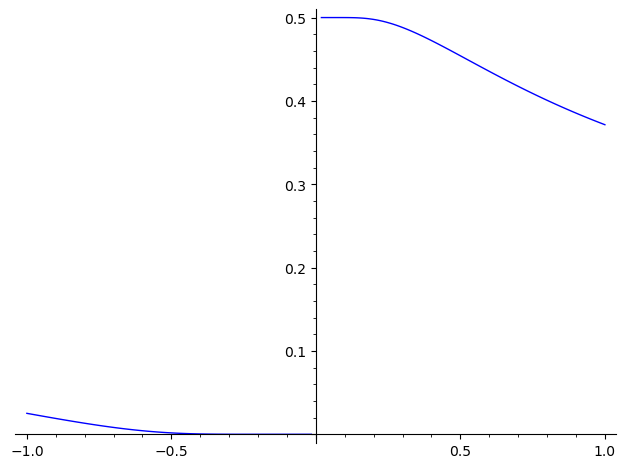

In [11]:
plot(soln[0].rhs())